In [1]:
#[실습] PyTorch의 MLP 프로그래밍
# -*- coding: utf-8 -*-

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)#DataFrame으로 변환하지 않도록 설정
X = mnist.data/255
y = mnist.target

In [2]:
import matplotlib.pyplot as plt

In [3]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
X.shape

(70000, 784)

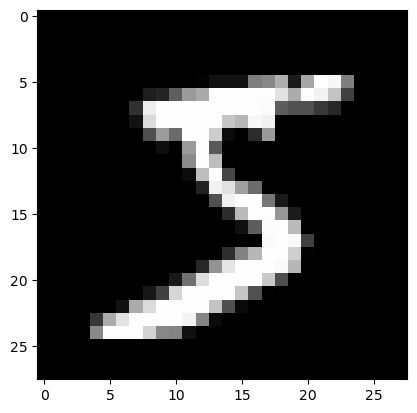

In [5]:
plt.imshow(X[0].reshape(28,28), cmap='gray')

In [6]:
plt.show()
print("이미지 레이블: {}".format(y[0]))

이미지 레이블: 5


In [7]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/7, random_state=0)
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(list(map(int, y_train)))
y_test = torch.LongTensor(list(map(int, y_test)))

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)


In [8]:
from torch import nn
model = nn.Sequential( )
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100,100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100,10))

In [9]:
from torch import optim
loss_fn = nn.CrossEntropyLoss() #
optimizer = optim.Adam(model.parameters( ), lr=0.01)

In [10]:
def train(epoch):
    model.train()
    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward() 
        optimizer.step()
    print('에포크 {}: 완료'.format(epoch))

In [11]:
def test(head):
    model.eval() # E^E 952 
    correct = 0
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
    data_num = len(loader_test.dataset)
    print('{} 정확도 :{}/{}({:.0f}%)'.format(head,correct,data_num,100*correct/data_num))
    #print('{} 정확도: {}/{}({:.Of}%)'.format(head, correct, data_num, 100.*correct/data_num))

In [12]:
test('시작')
for epoch in range(3): 
    train(epoch) 
    test('학습중') 
test('학습 후')

시작 정확도 :978/10000(10%)
에포크 0: 완료
학습중 정확도 :9493/10000(95%)
에포크 1: 완료
학습중 정확도 :9460/10000(95%)
에포크 2: 완료
학습중 정확도 :9550/10000(96%)
학습 후 정확도 :9550/10000(96%)


10 번째 학습데이터 테스트 결과 : tensor([-21.2931,  15.9167,  -7.7905,  -8.7421, -12.6379, -13.2327, -15.0067,
          2.1280,  -9.2885,  -8.8896], grad_fn=<AddBackward0>)
10 번째 데이터 예측 : torch.return_types.max(
values=tensor(15.9167),
indices=tensor(1))
싷제 레이블 : 1


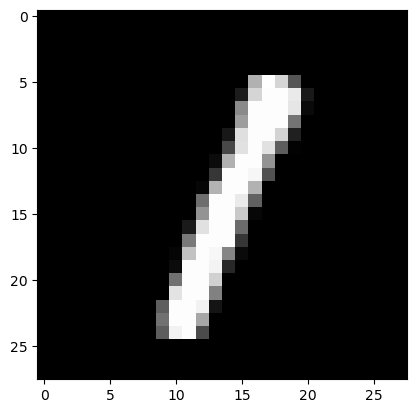

In [13]:
index = 10 # 테스트 데이터 중에서 확인해볼 데이터의 인덱스
model.eval() # 9
data = X_test[index]
output = model(data) #
print('{} 번째 학습데이터 테스트 결과 : {}'.format(index,output))
predicted = torch.max(output.data, 0)
print('{} 번째 데이터 예측 : {}'.format(index, predicted))
X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
print('싷제 레이블 : {}'.format(y_test[index]))